<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/Emotion_classification_based_on_users_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Emotion classification based on user's tweets**

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('twitter_data.csv')

# checking the shape of dataset
shape = data.shape
print(f"The data has {shape[0]} rows and {shape[1]} columns.")

The data has 10017 rows and 4 columns.


In [ ]:
data.head()

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy


In [ ]:
data.columns

Index(['Sl no', 'Tweets', 'Search key', 'Feeling'], dtype='object')

In [ ]:
# checking nan values
data.isna().sum()

Sl no         0
Tweets        0
Search key    0
Feeling       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10017 entries, 0 to 10016
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sl no       10017 non-null  int64 
 1   Tweets      10017 non-null  object
 2   Search key  10017 non-null  object
 3   Feeling     10017 non-null  object
dtypes: int64(1), object(3)
memory usage: 313.2+ KB


The data has no any missing values.

In [ ]:
# Checking and removing duplicate rows
if data.duplicated().values.any():
  data = data.drop_duplicates()
  print('Duplicate rows removed.')
print(data.shape)

Duplicate rows removed.
(10016, 4)


Checking for non English tweets

In [ ]:
import re
import nltk
import string

In [ ]:
!pip install langdetect

In [ ]:
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Apply language detection function to the 'Tweets' column
data['Language'] = data['Tweets'].apply(detect_language)

# Count non-English tweets
non_english_count = data[data['Language'] != 'en'].shape[0]

# Print number of non-English tweets
print("Number of non-English tweets:", non_english_count)


Number of non-English tweets: 1298


In [ ]:
# pd.set_option('display.max_rows', None)
data[data['Language']!='en']

,Sl no,Tweets,Search key,Feeling,Language
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy,ja
10,11,"#11: @[17's Maga] 💎 #JONASBROTHERS ed ""RT @pl...",happy moments,happy,et
39,40,"#40: @Narcos ✨ ed ""Happy birthday boy tequila...",happy moments,happy,tl
44,45,"#45: @Raein Maizel Hebia ed ""Pero hoooy happy...",happy moments,happy,tl
50,51,"#51: @@Bernardo_Castro ed ""@violetaitalia Jus...",happy moments,happy,tl
...,...,...,...,...,...
9699,9703,Tweet #25: @오래되어 신뢰가는 상상티켓 【 ☎ O1O-2138-66O3 】...,tragedy,sad,ko
9874,9878,"Tweet #18: @Printot👑 tweeted ""Annoying mga tao...",annoying,angry,tl
9881,9885,"Tweet #25: @Dewwww tweeted ""@tubirfess tapi em...",annoying,angry,id
9922,9926,"Tweet #66: @shagirl tweeted ""RT @alyshaameera_...",annoying,angry,id


In [ ]:
data['Tweets'][39]

' #40: @Narcos ✨ ed "Happy birthday boy tequila na laging wasak sa inuman! 🍻 Enjoy your day my amigo more lasing moments hahaha sa fb natong video nimo nga  mintras nag kamang ga suka hehe 😘 @mr_swaveh https://t.co/gZ5pCvrBXq"'

In [ ]:
print(data['Language'].unique())
print(len(data['Language'].unique()))

['en' 'ja' 'et' 'tl' 'af' 'da' 'ar' 'ko' 'de' 'nl' 'th' 'so' 'es' 'ca'
 'id' 'fr' 'no' 'it' 'fi' 'vi' 'pl' 'pt' 'sw' 'bg' 'tr' 'hr' 'hi' 'ru'
 'cy' 'uk' 'ta' 'ne' 'ro' 'sk' 'sv' 'sl' 'sq' 'ur' 'cs' 'el']
40


In [ ]:
# Remove rows that are not in English
data = data[data['Language'] == 'en']

# Reset index after filtering
data.reset_index(drop=True, inplace=True)

data.shape

(8718, 5)

In [ ]:
# Removal of URLs
import warnings
warnings.filterwarnings('ignore')

data['Clean_Tweets'] = data['Tweets'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)

data.head()

,Sl no,Tweets,Search key,Feeling,Language,Clean_Tweets
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy,en,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking..."
1,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy,en,"#3: @Ris ♡ ed ""Happy birthday to one smokin h..."
2,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy,en,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u..."
3,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy,en,"#5: @Madhurima wth u vc♥ ed ""Good morning dea..."
4,6,"#6: @Jeinalís Ramos ed ""Happy moments 🙏🏽 http...",happy moments,happy,en,"#6: @Jeinalís Ramos ed ""Happy moments 🙏🏽"


In [ ]:
# Before removing urls
data.Tweets[6]

' #8: @Yanny Sandal ed "I don’t give two shits about this Met Gala and just want it off my Twitter ‘moments’ page. I’ve seen enough Disney movies—I’m over these costumes AND I could have lived a long, happy life never seeing Harry Styles in a weird night gown ensemble.  So whatever CAMP is, let’s not"'

In [ ]:
# After removing urls
data.Clean_Tweets[6]

' #8: @Yanny Sandal ed "I don’t give two shits about this Met Gala and just want it off my Twitter ‘moments’ page. I’ve seen enough Disney movies—I’m over these costumes AND I could have lived a long, happy life never seeing Harry Styles in a weird night gown ensemble.  So whatever CAMP is, let’s not"'

In [ ]:
# Remove leading "@username" mentions
data['Clean_Tweets'] = data['Clean_Tweets'].str.replace(r'@\w+', '', regex=True)

In [ ]:
# Remove leading "hashtags"
data['Clean_Tweets'] = data['Clean_Tweets'].str.replace(r'#[A-Za-z0-9]+', '', regex=True)

In [ ]:
data.Clean_Tweets[6]

' :  Sandal ed "I don’t give two shits about this Met Gala and just want it off my Twitter ‘moments’ page. I’ve seen enough Disney movies—I’m over these costumes AND I could have lived a long, happy life never seeing Harry Styles in a weird night gown ensemble.  So whatever CAMP is, let’s not"'

In [ ]:
# Remove Retweet
data['Clean_Tweets'] = data['Clean_Tweets'].str.replace(r'\bRT\b\s*:', '', regex=True)
data['Clean_Tweets'] = data['Clean_Tweets'].str.replace(r'\bCC\b\s*:', '', regex=True)

In [ ]:
data.Clean_Tweets.head()

0     :  ed " Time is ticking fast. Relive the past...
1     :  ♡ ed "Happy birthday to one smokin hot mam...
2     :  [씍쯴사랑로봇] jwinnie is the best, cheer up jwi...
3     :  wth u vc♥ ed "Good morning dear❤  Wishing ...
4                       :  Ramos ed "Happy moments 🙏🏽 
Name: Clean_Tweets, dtype: object

In [ ]:
# seperating the features and label

X_features = data[['Clean_Tweets']]
Y_label = data['Feeling']
print(X_features.shape)
print(Y_label.shape)

(8718, 1)
(8718,)


In [ ]:
# Text Preprocessing
# Lower Casing
X_features = X_features.applymap(str.lower)

X_features['Clean_Tweets'][0]

' :  ed " time is ticking fast. relive the past happy moments while we can. be the joy to everyone\'s face.  …"'

In [ ]:
# Conversion of Emoji to Words
!pip install emoji
import emoji

def convert_emoji_to_words(string):
    string = emoji.demojize(string)
    return string.replace(":", " ").replace("_", " ")

# Converting emojis to words in each column
X_features['Clean_Tweets'] = X_features['Clean_Tweets'].apply(lambda text: convert_emoji_to_words(text))
# for k in data.columns:
#     data[k] = data[k].apply(lambda text: convert_emoji_to_words(text))

X_features['Clean_Tweets'].head()

0        ed " time is ticking fast. relive the past...
1        ♡ ed "happy birthday to one smokin hot mam...
2        [씍쯴사랑로봇] jwinnie is the best, cheer up jwi...
3        wth u vc heart suit  ed "good morning dear...
4        ramos ed "happy moments  folded hands medi...
Name: Clean_Tweets, dtype: object

In [ ]:
X_features['Clean_Tweets'][39]

'    ed "why im absolutely positive that true friendship is not about how long youve known someone. ive been through a lot with this girl in just a short time - funny, happy, sad moments. i will forever treasure those times, . here\'s to hoping we\'ll have more soon.  red heart  '

In [ ]:
# Remove any left over emojis that are not converted to words
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"  # Enclosed characters
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

X_features['Clean_Tweets'] = X_features['Clean_Tweets'].apply(remove_emoji)

In [ ]:
X_features['Clean_Tweets'][39]

'    ed "why im absolutely positive that true friendship is not about how long youve known someone. ive been through a lot with this girl in just a short time - funny, happy, sad moments. i will forever treasure those times, . here\'s to hoping we\'ll have more soon.  red heart  '

In [ ]:
# # Using regex to replace non-ASCII characters with an empty string
# def remove_non_ascii(text):
#     return re.sub(r'[^\x00-\x7F]', ' ', text)

# X_features['Tweets'] = X_features['Tweets'].apply(remove_non_ascii)
# # # Applying to each column
# # for column in data.columns:
# #     data['Tweets'] = data['Tweets'].apply(remove_non_ascii)

# X_features.head()

In [ ]:
# Remove word - 'tweet' and 'tweeted' from Tweets column
X_features['Clean_Tweets'] = X_features['Clean_Tweets'].str.replace(r'\b(tweet(?:ed)?)\b', '', regex=True).str.strip()

In [ ]:
X_features['Clean_Tweets'][0]

'ed " time is ticking fast. relive the past happy moments while we can. be the joy to everyone\'s face.  …"'

In [ ]:
# Removal of Punctuations
PUNCT_TO_REMOVE = string.punctuation
# print(PUNCT_TO_REMOVE)

def remove_punctuation(text):
  return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

X_features['Clean_Tweets']= X_features['Clean_Tweets'].apply(lambda text: remove_punctuation(text))

X_features.head()

,Clean_Tweets
0,ed time is ticking fast relive the past happy...
1,ed happy birthday to one smokin hot mama hot ...
2,jwinnie is the best cheer up jwinnie ed omg i...
3,wth u vc heart suit ed good morning dear red ...
4,ramos ed happy moments folded hands medium sk...


In [ ]:
# After removing punctuations
X_features.Clean_Tweets[3]

'wth u vc heart suit  ed good morning dear red heart   wishing you a day filled with sunshine  happiness  love n pleasant momentshave lovely day  red heart keep shining keep smiling always stay happy  slightly smiling face  slightly smiling face take carelove you  red heart'

In [ ]:
# Removal of stopwords ( 'the', 'a' etc)
from nltk.corpus import stopwords

# Downloading package stopwords
nltk.download('stopwords')

# set will remove any duplicate words
STOPWORDS = set(stopwords.words('english'))


def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

X_features['Clean_Tweets']= X_features['Clean_Tweets'].apply(lambda text: remove_stopwords(text))

X_features.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Clean_Tweets
0,ed time ticking fast relive past happy moments...
1,ed happy birthday one smokin hot mama hot face...
2,jwinnie best cheer jwinnie ed omg left 2 min 5...
3,wth u vc heart suit ed good morning dear red h...
4,ramos ed happy moments folded hands medium ski...


In [ ]:
X_features.Clean_Tweets[3]

'wth u vc heart suit ed good morning dear red heart wishing day filled sunshine happiness love n pleasant momentshave lovely day red heart keep shining keep smiling always stay happy slightly smiling face slightly smiling face take carelove red heart'

In [ ]:
# Lemmatization
# reducing inflected words to their word stem but it makes sure the root word (also called as lemma) belongs to the language.
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Downloading package wordnet
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

X_features['Clean_Tweets']= X_features['Clean_Tweets'].apply(lambda text: lemmatize_words(text))

X_features.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Clean_Tweets
0,ed time ticking fast relive past happy moment ...
1,ed happy birthday one smokin hot mama hot face...
2,jwinnie best cheer jwinnie ed omg left 2 min 5...
3,wth u vc heart suit ed good morning dear red h...
4,ramos ed happy moment folded hand medium skin ...


In [ ]:
X_features.tail()

,Clean_Tweets
8713,airplane departure youre irritating booooooooo...
8714,controversy causedyes know expect kind corpora...
8715,that’s irritating enraged face wish people car...
8716,ricky sharma g aapne besharmi ki saari hadhe p...
8717,exe u know hate indie alternative whatever gen...


In [ ]:
def remove_specific_word(text, word='ed'):

    pattern = r'\b' + re.escape(word) + r'\b'

    cleaned_text = re.sub(pattern, ' ', text)

    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

X_features['Clean_Tweets'] = X_features['Clean_Tweets'].apply(remove_specific_word)

In [ ]:
X_features['Clean_Tweets'].head()

0    time ticking fast relive past happy moment joy...
1    happy birthday one smokin hot mama hot face lo...
2    jwinnie best cheer jwinnie omg left 2 min 5010...
3    wth u vc heart suit good morning dear red hear...
4      ramos happy moment folded hand medium skin tone
Name: Clean_Tweets, dtype: object

In [ ]:
# # Using regex to replace non-ASCII characters with an empty string
# def remove_non_ascii(text):
#     return re.sub(r'[^\x00-\x7F]', ' ', text)

# # Applying to each column
# for column in X_features.columns:
#     X_features[column] = X_features[column].apply(remove_non_ascii)

# X_features.head()

Checking for Duplicate tweets after preprocessing text

In [ ]:
X_features.duplicated().values.any()

True

In [ ]:
X_features.duplicated().sum()

761

In [ ]:
X_features[X_features.duplicated()]

,Clean_Tweets
16,happy birthday kumikoin honor celebrate best m...
38,“somewhere middle happy moment sigh little mem...
44,hear sing “amen” saturday night remain one mov...
60,time ticking fast relive past happy moment joy...
105,four leaf clover amazing see celebrity wearing...
...,...
8617,im clingy type clingy annoying thank
8622,im clingy type clingy annoying thank
8670,comminist party directive 1943 “when certain o...
8683,irritating face tear joy face tear joy face te...


In [ ]:
# concatenating features and label
print(X_features.shape)
print(Y_label.shape)
concat_data = pd.concat([X_features, Y_label], axis=1)

(8718, 1)
(8718,)


In [ ]:
concat_data.head(n=10)

,Clean_Tweets,Feeling
0,time ticking fast relive past happy moment joy...,happy
1,happy birthday one smokin hot mama hot face lo...,happy
2,jwinnie best cheer jwinnie omg left 2 min 5010...,happy
3,wth u vc heart suit good morning dear red hear...,happy
4,ramos happy moment folded hand medium skin tone,happy
5,rogers movie made happy several way think rely...,happy
6,sandal don’t give two shit met gala want twitt...,happy
7,beautiful barbie bride fixed dress moment walk...,happy
8,tornado someone great one best chick flick rom...,happy
9,ashtan moment best make u happy love two ashtan,happy


In [ ]:
# Removing duplicates in the 'Clean_Tweets' column
concat_data.drop_duplicates(subset='Clean_Tweets', keep='first', inplace=True)
print(concat_data.shape)

(7957, 2)


In [ ]:
concat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7957 entries, 0 to 8717
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Clean_Tweets  7957 non-null   object
 1   Feeling       7957 non-null   object
dtypes: object(2)
memory usage: 186.5+ KB


#Exploratory Data Analysis (EDA)

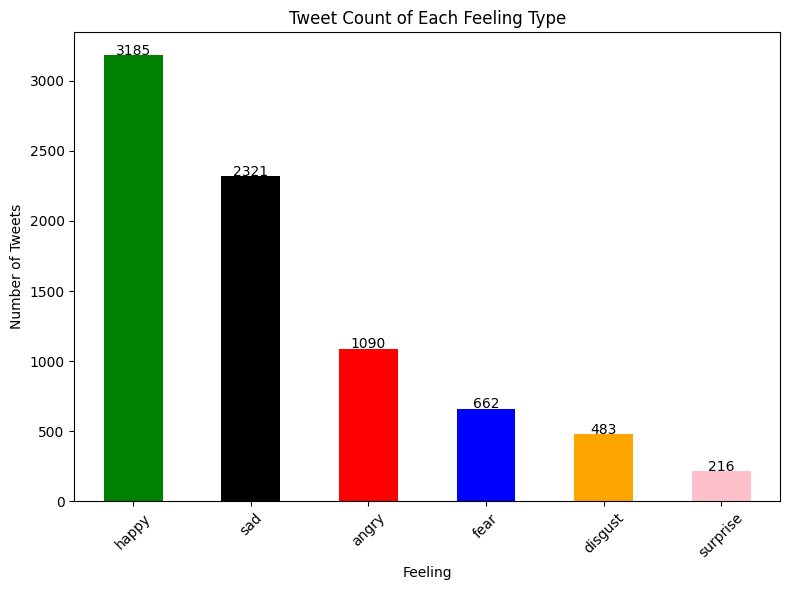

In [ ]:
import matplotlib.pyplot as plt
# Bar Plot of Feeling Counts

feelings_counts = concat_data['Feeling'].value_counts()

plt.figure(figsize=(8, 6))
feelings_counts.plot(kind='bar', color=['green', 'black','red','blue','orange','pink'])
plt.title('Tweet Count of Each Feeling Type')
plt.xlabel('Feeling')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding text labels on top of each bar
for i in range(len(feelings_counts)):
  plt.text(i, feelings_counts[i]+1, str(feelings_counts[i]), ha='center')

plt.show()


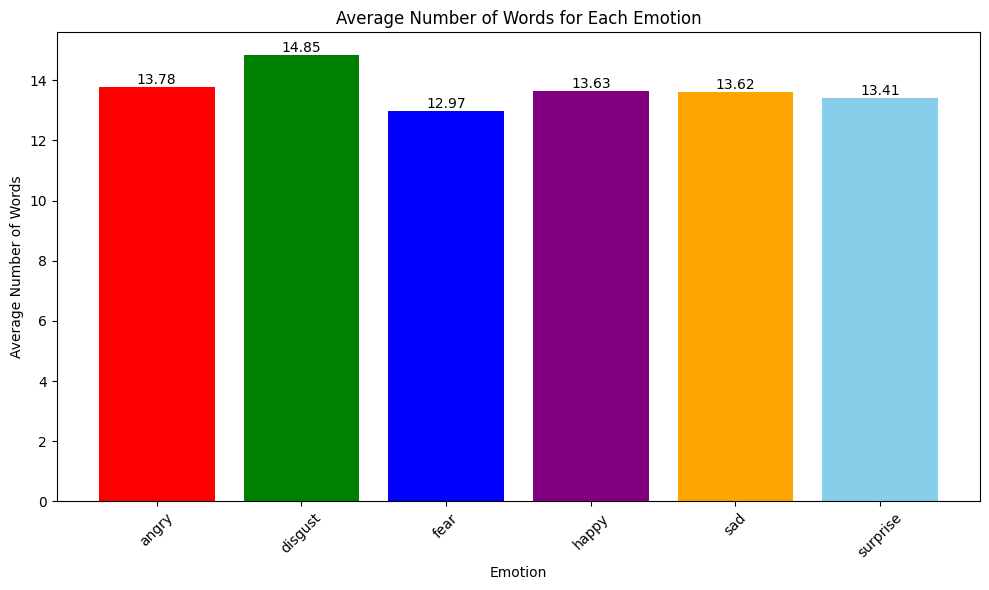

In [ ]:
# number of words in each tweet
concat_data['Words Per Tweet'] = concat_data['Clean_Tweets'].apply(lambda x: len(x.split()))

# average number of words for each emotion
avg_num_words = concat_data.groupby('Feeling')['Words Per Tweet'].mean().reset_index()

colors = ['red', 'green', 'blue', 'purple', 'orange','skyblue']

# bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_num_words['Feeling'], avg_num_words['Words Per Tweet'], color=colors)
plt.xlabel('Emotion')
plt.ylabel('Average Number of Words')
plt.title('Average Number of Words for Each Emotion')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding text labels on top of each bar
for i in range(len(avg_num_words['Words Per Tweet'])):
  plt.text(i, avg_num_words['Words Per Tweet'][i] + 0.1, str(round(avg_num_words['Words Per Tweet'][i],2)), ha='center')
plt.show()

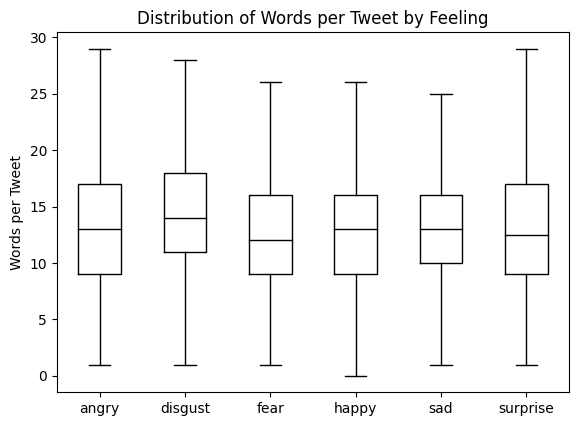

In [ ]:
# Words per Tweet by Feeling

# Create the boxplot
concat_data.boxplot('Words Per Tweet', by="Feeling", grid=False,showfliers=False, color="black")

# Remove default title and x-label
plt.suptitle("")
plt.xlabel("")

# title
plt.title("Distribution of Words per Tweet by Feeling")

# y-label
plt.ylabel("Words per Tweet")

plt.show()

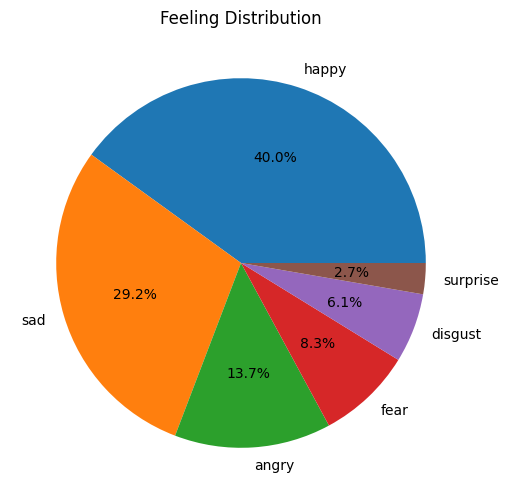

In [ ]:
# Pie Chart of Feeling Distribution
plt.figure(figsize=(8, 6))
concat_data['Feeling'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Feeling Distribution')
plt.ylabel('')
plt.show()

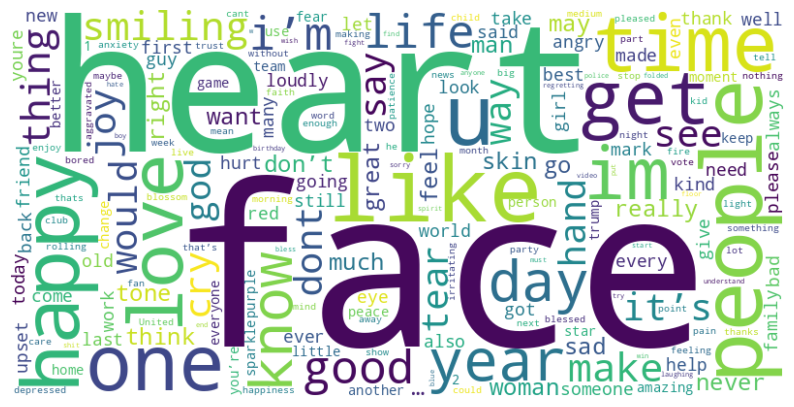

In [ ]:
# Word Cloud of Tweets
from wordcloud import WordCloud
from collections import Counter
all_tweets = ' '.join(concat_data['Clean_Tweets'])

words = all_tweets.split()

# Generate word frequencies
word_freq = Counter([word for word in words])

# Filter out words that appear fewer than 10 times
filtered_freq = {word: count for word, count in word_freq.items() if count >= 10}

# Create a word cloud object, considering only words that appear at least 10 times
wc = WordCloud(width=800, height=400, background_color='white', max_words=200)

# Generate word cloud from filtered frequencies
wc.generate_from_frequencies(filtered_freq)

# Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

# wordcloud = WordCloud(width=800,height=400,background_color='white').generate(all_tweets)
# plt.figure(figsize=(10,8))
# plt.imshow(wordcloud,interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Tweets',fontsize = 20)
# plt.show()

In [ ]:
# seperating the features and label
X_features = concat_data[['Clean_Tweets']]
Y_label = concat_data['Feeling']

print(X_features.shape)
print(Y_label.shape)

(7957, 1)
(7957,)


In [ ]:
concat_data[['Clean_Tweets', 'Feeling']].describe()

,Clean_Tweets,Feeling
count,7957,7957
unique,7957,6
top,time ticking fast relive past happy moment joy...,happy
freq,1,3185


**One Hot Encoding for Categorical Features**

In [ ]:
# One Hot Encoding for Categorical Features
from sklearn.preprocessing import OneHotEncoder

# Create instance of OneHotEncoder
ENCODER = OneHotEncoder()
ENCODER.fit(X_features)

# print(ENCODER.categories_)
encoded_X_features = ENCODER.transform(X_features).toarray()

In [ ]:
labels = Y_label.unique()
print(labels)

['happy' 'sad' 'angry' 'fear' 'disgust' 'surprise']


**One hot encoding for Label**

In [ ]:
# One hot encoding for Label
label_encoded = []
for k in Y_label:
  if k=='happy':
    label_encoded.append(0)
  elif k == 'sad':
    label_encoded.append(1)
  elif k == 'angry':
    label_encoded.append(2)
  elif k == 'fear':
    label_encoded.append(3)
  elif k == 'disgust':
    label_encoded.append(4)
  elif k == 'surprise':
    label_encoded.append(5)

print(label_encoded)

label_array = np.array(label_encoded).reshape(-1,1)

# ENCODER = OneHotEncoder()
ENCODER.fit(label_array)
print(ENCODER.categories_)

encoded_Y = ENCODER.transform(label_array).toarray()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

**Split the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(encoded_X_features,encoded_Y,test_size=.2,stratify=encoded_Y)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(class_weight='balanced')
#train the model
random.fit(X_train,y_train)

# test the model
pred_lbls_rf = random.predict(X_test)

# Accuracy of the model
accuracy_ran_forest= accuracy_score(y_test,pred_lbls_rf)
accuracy_ran_forest = round(accuracy_ran_forest * 100,2)
print(f"The accuracy of the Random Forest Model is {accuracy_ran_forest}%")

# Confusion Matrix
rf_cm = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_rf).argmax(axis=1))
print('confusion_matrix:')
print(rf_cm)

# precision_score
ran_forest_ps = precision_score(y_test,pred_lbls_rf,average='micro')
print('precision_score:',ran_forest_ps)

# recall score
ran_forest_rs = recall_score(y_test,pred_lbls_rf,average='micro')
print('recall score:',ran_forest_rs)

# f1 score
ran_forest_fs = f1_score(y_test,pred_lbls_rf,average='micro')
print('f1 score:',ran_forest_fs)

The accuracy of the Random Forest Model is 40.01%
confusion_matrix:
[[637   0   0   0   0   0]
 [464   0   0   0   0   0]
 [218   0   0   0   0   0]
 [133   0   0   0   0   0]
 [ 97   0   0   0   0   0]
 [ 43   0   0   0   0   0]]
precision_score: 0.4001256281407035
recall score: 0.4001256281407035
f1 score: 0.4001256281407035


**XGBoost**

In [ ]:
# XGBoost
from xgboost import XGBClassifier
from collections import Counter

# Apply SMOTE (Synthetic Minority Over-sampling Technique)
# oversample the minority classes to make the dataset more balanced.
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Instantiation
model_xg = XGBClassifier()

# Training the model
model_xg.fit(X_train_smote, y_train_smote)

# Predict the model
pred_lbls_xg = model_xg.predict(X_test)
# print(pred_lbls_xg)

# Accuracy of the model
accuracy_xg= accuracy_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg).argmax(axis=1))
accuracy_xg = round(accuracy_xg * 100,2)
print(f"The accuracy of the XGBoost Model is {accuracy_xg}%")

# Confusion Matrix
xg_cm = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg).argmax(axis=1))
print('confusion_matrix:')
print(xg_cm)

# precision_score
xg_ps = precision_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg).argmax(axis=1),average='micro')
print('precision_score:',xg_ps)

# recall score
xg_rs = recall_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg).argmax(axis=1),average='micro')
print('recall score:',xg_rs)

# f1 score
xg_fs = f1_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg).argmax(axis=1),average='micro')
print('f1 score:',xg_fs)

The accuracy of the XGBoost Model is 40.01%
confusion_matrix:
[[637   0   0   0   0   0]
 [464   0   0   0   0   0]
 [218   0   0   0   0   0]
 [133   0   0   0   0   0]
 [ 97   0   0   0   0   0]
 [ 43   0   0   0   0   0]]
precision_score: 0.4001256281407035
recall score: 0.4001256281407035
f1 score: 0.4001256281407035


**Sentence Embedding**

In [ ]:
# Install the sentence-transformers
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
# Initialize the SentenceTransformer model
# Dim - 384
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
# Applying the embedding and adding it to the dataframe
concat_data['embeddings'] = concat_data['Clean_Tweets'].apply(model.encode)

In [ ]:
concat_data.head()

,Clean_Tweets,Feeling,Words Per Tweet,embeddings
0,time ticking fast relive past happy moment joy...,happy,11,"[-0.01531109, 0.064955585, 0.013823219, 0.0112..."
1,happy birthday one smokin hot mama hot face lo...,happy,28,"[-0.114104055, 0.03721874, 0.09114756, -0.0010..."
2,jwinnie best cheer jwinnie omg left 2 min 5010...,happy,43,"[-0.095553674, 0.057001263, 0.084796906, -0.01..."
3,wth u vc heart suit good morning dear red hear...,happy,40,"[-0.058090065, 0.1099632, 0.09562659, 0.060727..."
4,ramos happy moment folded hand medium skin tone,happy,8,"[-0.037154056, 0.11343725, -0.0041305795, 0.05..."


In [ ]:
# Converting the embeddings to list and then to a numpy array
X_feat = np.array(concat_data['embeddings'].tolist())

# Ensure the input features have a 2D shape
# X_feat = X_feat.reshape(-1, 1)
X_feat = X_feat.reshape(X_feat.shape[0], -1)
X_feat.shape

(7957, 384)

**Split the data into training and testing using embedded features and encoded labels for Neural Network**

In [ ]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_feat,encoded_Y,test_size=.2,stratify=encoded_Y)

In [ ]:
X_train.shape[1]

384

In [ ]:
#Random Forest with Sentence Embedding

random_emb = RandomForestClassifier(class_weight='balanced')

#train the model
random_emb.fit(X_train,y_train)

# test the model
pred_lbls_rf_emb = random_emb.predict(X_test)

# Accuracy of the model
accuracy_rf_emb= accuracy_score(y_test,pred_lbls_rf_emb)
accuracy_rf_emb = round(accuracy_rf_emb * 100,2)
print(f"The accuracy of the Random Forest Model is {accuracy_rf_emb}%")

# Confusion Matrix
rf_cm_emb = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_rf_emb).argmax(axis=1))
print('confusion_matrix:')
print(rf_cm_emb)

# precision_score
rf_ps_emb = precision_score(y_test,pred_lbls_rf_emb,average='weighted')
print('precision_score:',rf_ps_emb)

# recall score
rf_rs_emb = recall_score(y_test,pred_lbls_rf_emb,average='weighted')
print('recall score:',rf_rs_emb)

# f1 score
rf_fs_emb = f1_score(y_test,pred_lbls_rf_emb,average='weighted')
print('f1 score:',rf_fs_emb)

The accuracy of the Random Forest Model is 21.98%
confusion_matrix:
[[637   0   0   0   0   0]
 [419  45   0   0   0   0]
 [206   1  11   0   0   0]
 [128   0   0   5   0   0]
 [ 86   0   0   0  11   0]
 [ 42   0   0   0   0   1]]
precision_score: 0.9510699535545892
recall score: 0.2198492462311558
f1 score: 0.3183576843642119


In [ ]:
# XGBoost with sentence embedding

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Instantiation
model_xg_emb = XGBClassifier()

# Training the model
model_xg_emb.fit(X_train_smote, y_train_smote)

# Predict the model
pred_lbls_xg_emb = model_xg_emb.predict(X_test)
# print(pred_lbls_xg)

# Accuracy of the model
accuracy_xg_emb= accuracy_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg_emb).argmax(axis=1))
accuracy_xg_emb = round(accuracy_xg_emb * 100,2)
print(f"The accuracy of the XGBoost Model is {accuracy_xg_emb}%")

# Confusion Matrix
xg_cm_emb = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg_emb).argmax(axis=1))
print('confusion_matrix:')
print(xg_cm_emb)

# precision_score
xg_ps_emb = precision_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg_emb).argmax(axis=1),average='weighted')
print('precision_score:',xg_ps_emb)

# recall score
xg_rs_emb = recall_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg_emb).argmax(axis=1),average='weighted')
print('recall score:',xg_rs_emb)

# f1 score
xg_fs_emb = f1_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg_emb).argmax(axis=1),average='weighted')
print('f1 score:',xg_fs_emb)

The accuracy of the XGBoost Model is 62.5%
confusion_matrix:
[[605  24   3   4   1   0]
 [240 213   8   1   2   0]
 [130  12  74   1   1   0]
 [ 78   7   1  46   1   0]
 [ 53   2   2   0  40   0]
 [ 25   1   0   0   0  17]]
precision_score: 0.7239523305413099
recall score: 0.625
f1 score: 0.6029793192538903


In [ ]:
# Using Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Convert one-hot encoded labels back to a single label format
y_labels = np.argmax(encoded_Y, axis=1)

class_weights = compute_class_weight('balanced', classes=np.unique(y_labels), y=y_labels)

# Convert class weights to a dictionary to pass to model training
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}


In [ ]:
# Feed Forward Network
model_miniLM = Sequential()

# Input Layer
model_miniLM.add(Dense(256,input_shape=(X_train.shape[1],)))
model_miniLM.add(LeakyReLU())
model_miniLM.add(BatchNormalization())

# Hidden Layer
model_miniLM.add(Dense(128))
model_miniLM.add(LeakyReLU())
model_miniLM.add(BatchNormalization())
model_miniLM.add(Dropout(0.2))
model_miniLM.add(Dense(64))
model_miniLM.add(LeakyReLU())
model_miniLM.add(BatchNormalization())
model_miniLM.add(Dropout(0.2))
model_miniLM.add(Dense(32))
model_miniLM.add(LeakyReLU())
model_miniLM.add(BatchNormalization())
model_miniLM.add(Dense(16))
model_miniLM.add(LeakyReLU())
model_miniLM.add(BatchNormalization())

# Output Layer
model_miniLM.add(Dense(6,activation='softmax'))

In [ ]:
# compile the model
model_miniLM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model
model_miniLM.fit(X_train,y_train,epochs=150,batch_size=10,class_weight=class_weight_dict)

Epoch 1/150
637/637 [==============================] - 7s 6ms/step - loss: 1.5060 - accuracy: 0.3958
Epoch 2/150
637/637 [==============================] - 5s 8ms/step - loss: 1.1470 - accuracy: 0.5279
Epoch 3/150
637/637 [==============================] - 4s 6ms/step - loss: 1.0359 - accuracy: 0.5720
Epoch 4/150
637/637 [==============================] - 4s 6ms/step - loss: 0.9545 - accuracy: 0.6093
Epoch 5/150
637/637 [==============================] - 8s 12ms/step - loss: 0.9120 - accuracy: 0.6134
Epoch 6/150
637/637 [==============================] - 4s 6ms/step - loss: 0.8676 - accuracy: 0.6165
Epoch 7/150
637/637 [==============================] - 4s 6ms/step - loss: 0.8154 - accuracy: 0.6462
Epoch 8/150
637/637 [==============================] - 5s 8ms/step - loss: 0.8036 - accuracy: 0.6429
Epoch 9/150
637/637 [==============================] - 5s 8ms/step - loss: 0.7821 - accuracy: 0.6487
Epoch 10/150
637/637 [==============================] - 8s 12ms/step - loss: 0.7289 - accu

In [ ]:
# Evaluate the Model
_,accuracy = model_miniLM.evaluate(X_test,y_test)
accuracy = round(accuracy*100,2)
print(f'Accuracy: {accuracy}%')

50/50 [==============================] - 1s 5ms/step - loss: 1.3361 - accuracy: 0.7016
Accuracy: 70.16%


In [ ]:
pred_lbels = model_miniLM.predict(X_test)

50/50 [==============================] - 0s 3ms/step


In [ ]:
# Confusion Matrix
nn_cm = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbels).argmax(axis=1))
print('confusion_matrix:')
print(nn_cm)

# precision_score
nn_ps = precision_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_lbels,axis=1),average='micro')
print('precision_score:',nn_ps)

# recall score
nn_rs = recall_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_lbels,axis=1),average='micro')
print('recall score:',nn_rs)

# f1 score
nn_fs = f1_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_lbels,axis=1),average='micro')
print('f1 score:',nn_fs)

confusion_matrix:
[[477  81  30  16  14  19]
 [ 70 338  37   5  10   4]
 [ 28  34 144   5   3   4]
 [ 25  27   5  71   4   1]
 [ 10  13   9   3  62   0]
 [  6   7   2   2   1  25]]
precision_score: 0.7016331658291457
recall score: 0.7016331658291457
f1 score: 0.7016331658291457


In [ ]:
# Implementing Neural Network with Tanh Activation

# Feed Forward Network
model_miniLM1 = Sequential()

# Input Layer
model_miniLM1.add(Dense(256,input_shape=(X_train.shape[1],),activation='tanh'))
model_miniLM1.add(BatchNormalization())

# Hidden Layer
model_miniLM1.add(Dense(128,activation='tanh'))
model_miniLM1.add(BatchNormalization())
model_miniLM1.add(Dropout(0.25))
model_miniLM1.add(Dense(64,activation='tanh'))
model_miniLM1.add(BatchNormalization())
model_miniLM1.add(Dropout(0.25))
model_miniLM1.add(Dense(32,activation='tanh'))
model_miniLM1.add(BatchNormalization())
model_miniLM1.add(Dropout(0.25))
model_miniLM1.add(Dense(16,activation='tanh'))
model_miniLM1.add(BatchNormalization())

# Output Layer
model_miniLM1.add(Dense(6,activation='softmax'))

In [ ]:
# compile the model
model_miniLM1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model
model_miniLM1.fit(X_train,y_train,epochs=100,batch_size=32,class_weight=class_weight_dict)

Epoch 1/100
199/199 [==============================] - 5s 7ms/step - loss: 1.6801 - accuracy: 0.3307
Epoch 2/100
199/199 [==============================] - 1s 7ms/step - loss: 1.3104 - accuracy: 0.4506
Epoch 3/100
199/199 [==============================] - 1s 7ms/step - loss: 1.1578 - accuracy: 0.5205
Epoch 4/100
199/199 [==============================] - 1s 7ms/step - loss: 1.0626 - accuracy: 0.5522
Epoch 5/100
199/199 [==============================] - 1s 7ms/step - loss: 0.9725 - accuracy: 0.5934
Epoch 6/100
199/199 [==============================] - 1s 7ms/step - loss: 0.9580 - accuracy: 0.6079
Epoch 7/100
199/199 [==============================] - 2s 9ms/step - loss: 0.8851 - accuracy: 0.6314
Epoch 8/100
199/199 [==============================] - 2s 11ms/step - loss: 0.8435 - accuracy: 0.6449
Epoch 9/100
199/199 [==============================] - 2s 9ms/step - loss: 0.8148 - accuracy: 0.6506
Epoch 10/100
199/199 [==============================] - 1s 7ms/step - loss: 0.8193 - accur

In [ ]:
# Evaluate the Model
_,accuracy1 = model_miniLM1.evaluate(X_test,y_test)
accuracy1 = round(accuracy1*100,2)
print(f'Accuracy: {accuracy1}%')

50/50 [==============================] - 1s 4ms/step - loss: 1.1266 - accuracy: 0.6822
Accuracy: 68.22%


In [ ]:
pred_lbels1 = model_miniLM1.predict(X_test)

50/50 [==============================] - 0s 4ms/step


In [ ]:
# Confusion Matrix
nn_cm1 = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbels1).argmax(axis=1))
print('confusion_matrix:')
print(nn_cm1)

# precision_score
nn_ps1 = precision_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_lbels1,axis=1),average='micro')
print('precision_score:',nn_ps1)

# recall score
nn_rs1 = recall_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_lbels1,axis=1),average='micro')
print('recall score:',nn_rs1)

# f1 score
nn_fs1 = f1_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_lbels1,axis=1),average='micro')
print('f1 score:',nn_fs1)

confusion_matrix:
[[441  76  52  26  23  19]
 [ 59 312  51  14  21   7]
 [ 18  26 154   5  11   4]
 [ 16  14   5  85   9   4]
 [  6  11  13   2  64   1]
 [  4   2   4   3   0  30]]
precision_score: 0.6821608040201005
recall score: 0.6821608040201005
f1 score: 0.6821608040201005


bert-base-nli-mean-tokens

In [ ]:
# SentenceBERT
# Dimension - 768
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')


In [ ]:
# Applying the embedding and adding it to the dataframe
concat_data['bert_embeddings'] = concat_data['Clean_Tweets'].apply(sbert_model.encode)

In [ ]:
# Converting the embeddings to list
X_embeded_feat = np.array(concat_data['bert_embeddings'].tolist())

# Ensure the input features have a 2D shape
X_embeded_feat = X_embeded_feat.reshape(X_embeded_feat.shape[0], -1)

In [ ]:
# Convert one-hot encoded labels back to a single label format
y_labels = np.argmax(encoded_Y, axis=1)

class_weights = compute_class_weight('balanced', classes=np.unique(y_labels), y=y_labels)

# Convert class weights to a dictionary to pass to model training
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}


# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_embeded_feat,encoded_Y,test_size=.2,stratify=encoded_Y)

In [ ]:
X_train.shape

(6365, 768)

In [ ]:
#Random Forest with SentenceBERT Embedding

random_emb1 = RandomForestClassifier()

#train the model
random_emb1.fit(X_train,y_train)

# test the model
pred_lbls_rf_emb1 = random_emb1.predict(X_test)

# Accuracy of the model
accuracy_rf_emb1= accuracy_score(y_test,pred_lbls_rf_emb1)
accuracy_rf_emb1 = round(accuracy_rf_emb1 * 100,2)
print(f"The accuracy of the Random Forest Model is {accuracy_rf_emb1}%")

# Confusion Matrix
rf_cm_emb1 = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_rf_emb1).argmax(axis=1))
print('confusion_matrix:')
print(rf_cm_emb1)

# precision_score
rf_ps_emb1 = precision_score(y_test,pred_lbls_rf_emb1,average='weighted')
print('precision_score:',rf_ps_emb1)

# recall score
rf_rs_emb1 = recall_score(y_test,pred_lbls_rf_emb1,average='weighted')
print('recall score:',rf_rs_emb1)

# f1 score
rf_fs_emb1 = f1_score(y_test,pred_lbls_rf_emb1,average='weighted')
print('f1 score:',rf_fs_emb1)

The accuracy of the Random Forest Model is 42.4%
confusion_matrix:
[[631   5   1   0   0   0]
 [280 184   0   0   0   0]
 [176   5  36   1   0   0]
 [116   5   0  12   0   0]
 [ 76   2   1   0  18   0]
 [ 33   1   0   0   0   9]]
precision_score: 0.8972173772216194
recall score: 0.4239949748743719
f1 score: 0.536059944728869


In [ ]:
# XGBoost with SentenceBERT embedding

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Instantiation
model_xg_emb1 = XGBClassifier()

# Training the model
model_xg_emb1.fit(X_train_smote, y_train_smote)

# Predict the model
pred_lbls_xg_emb1 = model_xg_emb1.predict(X_test)
# print(pred_lbls_xg)

# Accuracy of the model
accuracy_xg_emb1= accuracy_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg_emb1).argmax(axis=1))
accuracy_xg_emb1 = round(accuracy_xg_emb1 * 100,2)
print(f"The accuracy of the XGBoost Model is {accuracy_xg_emb1}%")

# Confusion Matrix
xg_cm_emb1 = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg_emb1).argmax(axis=1))
print('confusion_matrix:')
print(xg_cm_emb1)

# precision_score
xg_ps_emb1 = precision_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg_emb1).argmax(axis=1),average='weighted')
print('precision_score:',xg_ps_emb1)

# recall score
xg_rs_emb1 = recall_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg_emb1).argmax(axis=1),average='weighted')
print('recall score:',xg_rs_emb1)

# f1 score
xg_fs_emb1 = f1_score(np.asarray(y_test).argmax(axis=1),np.asarray(pred_lbls_xg_emb1).argmax(axis=1),average='weighted')
print('f1 score:',xg_fs_emb1)

The accuracy of the XGBoost Model is 65.95%
confusion_matrix:
[[608  20   7   0   2   0]
 [205 250   3   3   3   0]
 [110  16  87   3   2   0]
 [ 80   8   0  45   0   0]
 [ 45   6   7   0  39   0]
 [ 20   1   1   0   0  21]]
precision_score: 0.7357031450755899
recall score: 0.6595477386934674
f1 score: 0.6414527973975491


In [ ]:
# Implementing Neural Network
from tensorflow.keras.layers import BatchNormalization

# Feed Forward Network
model_bert = Sequential()

# Input Layer
# model_bert.add(Dense(512,input_shape=(X_train.shape[1],)))
model_bert.add(Dense(512,input_shape=(X_train.shape[1],)))
model_bert.add(LeakyReLU())
model_bert.add(BatchNormalization())

# Hidden Layer
model_bert.add(Dense(256))
model_bert.add(LeakyReLU())
model_bert.add(BatchNormalization())
model_bert.add(Dropout(0.3))
model_bert.add(Dense(128))
model_bert.add(LeakyReLU())
model_bert.add(BatchNormalization())
model_bert.add(Dropout(0.3))
model_bert.add(Dense(64))
model_bert.add(LeakyReLU())
model_bert.add(BatchNormalization())
model_bert.add(Dropout(0.3))
model_bert.add(Dense(32))
model_bert.add(LeakyReLU())
model_bert.add(BatchNormalization())


# Output Layer
model_bert.add(Dense(6,activation='softmax'))

In [ ]:
# compile the model
model_bert.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model
model_bert.fit(X_train,y_train,epochs=100,batch_size=32,class_weight=class_weight_dict)

Epoch 1/100
199/199 [==============================] - 7s 13ms/step - loss: 1.5979 - accuracy: 0.3961
Epoch 2/100
199/199 [==============================] - 3s 14ms/step - loss: 1.3070 - accuracy: 0.4965
Epoch 3/100
199/199 [==============================] - 3s 15ms/step - loss: 1.1963 - accuracy: 0.5318
Epoch 4/100
199/199 [==============================] - 5s 26ms/step - loss: 1.1108 - accuracy: 0.5623
Epoch 5/100
199/199 [==============================] - 4s 18ms/step - loss: 1.0317 - accuracy: 0.5822
Epoch 6/100
199/199 [==============================] - 3s 13ms/step - loss: 0.9951 - accuracy: 0.6027
Epoch 7/100
199/199 [==============================] - 2s 12ms/step - loss: 0.9179 - accuracy: 0.6179
Epoch 8/100
199/199 [==============================] - 2s 12ms/step - loss: 0.8929 - accuracy: 0.6266
Epoch 9/100
199/199 [==============================] - 2s 12ms/step - loss: 0.8452 - accuracy: 0.6526
Epoch 10/100
199/199 [==============================] - 3s 14ms/step - loss: 0.817

In [ ]:
# Evaluate the Model
_,accuracy_bert = model_bert.evaluate(X_test,y_test)
accuracy_bert = round(accuracy_bert*100,2)
print(f'Accuracy: {accuracy_bert}%')

50/50 [==============================] - 1s 6ms/step - loss: 1.4817 - accuracy: 0.6979
Accuracy: 69.79%


In [ ]:
pred_labels = model_bert.predict(X_test)

50/50 [==============================] - 0s 5ms/step


In [ ]:
# Confusion Matrix
nn_cm2 = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_labels).argmax(axis=1))
print('confusion_matrix:')
print(nn_cm2)

# precision_score
nn_ps2 = precision_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels,axis=1),average='weighted')
print('precision_score:',nn_ps2)

# recall score
nn_rs2 = recall_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels,axis=1),average='weighted')
print('recall score:',nn_rs2)

# f1 score
nn_fs2 = f1_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels,axis=1),average='weighted')
print('f1 score:',nn_fs2)

confusion_matrix:
[[519  46  31  26  11   4]
 [ 90 296  37  22  16   3]
 [ 38  22 141  12   2   3]
 [ 31  14   3  76   8   1]
 [ 15  15  10   2  53   2]
 [  9   2   3   2   1  26]]
precision_score: 0.6988852255357249
recall score: 0.6978643216080402
f1 score: 0.6962094112135842


In [ ]:
# Implementing Neural Network with Tanh Activation

# Feed Forward Network
model_bert1 = Sequential()

# Input Layer
model_bert1.add(Dense(512,input_shape=(X_train.shape[1],),activation='tanh'))
model_bert1.add(BatchNormalization())

# Hidden Layer
model_bert1.add(Dense(256,activation='tanh'))
model_bert1.add(BatchNormalization())
model_bert1.add(Dropout(0.25))
model_bert1.add(Dense(128,activation='tanh'))
model_bert1.add(BatchNormalization())
model_bert1.add(Dropout(0.25))
model_bert1.add(Dense(64,activation='tanh'))
model_bert1.add(BatchNormalization())
model_bert1.add(Dropout(0.25))
model_bert1.add(Dense(32,activation='tanh'))
model_bert1.add(BatchNormalization())
model_bert1.add(Dropout(0.25))
model_bert1.add(Dense(16,activation='tanh'))
model_bert1.add(BatchNormalization())

# Output Layer
model_bert1.add(Dense(6,activation='softmax'))

In [ ]:
# compile the model
model_bert1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model
model_bert1.fit(X_train,y_train,epochs=100,batch_size=32,class_weight=class_weight_dict)

Epoch 1/100
199/199 [==============================] - 7s 14ms/step - loss: 1.7805 - accuracy: 0.3474
Epoch 2/100
199/199 [==============================] - 2s 12ms/step - loss: 1.5155 - accuracy: 0.4013
Epoch 3/100
199/199 [==============================] - 2s 12ms/step - loss: 1.4314 - accuracy: 0.4471
Epoch 4/100
199/199 [==============================] - 2s 12ms/step - loss: 1.3361 - accuracy: 0.4804
Epoch 5/100
199/199 [==============================] - 3s 16ms/step - loss: 1.2434 - accuracy: 0.5076
Epoch 6/100
199/199 [==============================] - 3s 16ms/step - loss: 1.1821 - accuracy: 0.5339
Epoch 7/100
199/199 [==============================] - 2s 13ms/step - loss: 1.1026 - accuracy: 0.5576
Epoch 8/100
199/199 [==============================] - 2s 12ms/step - loss: 1.0617 - accuracy: 0.5661
Epoch 9/100
199/199 [==============================] - 2s 12ms/step - loss: 0.9924 - accuracy: 0.5937
Epoch 10/100
199/199 [==============================] - 3s 14ms/step - loss: 0.932

In [ ]:
# Evaluate the Model
_,accuracy_bert1 = model_bert1.evaluate(X_test,y_test)
accuracy_bert1 = round(accuracy_bert1*100,2)
print(f'Accuracy: {accuracy_bert1}%')

50/50 [==============================] - 1s 4ms/step - loss: 1.5114 - accuracy: 0.6319
Accuracy: 63.19%


In [ ]:
pred_labels1 = model_bert1.predict(X_test)

50/50 [==============================] - 0s 5ms/step


In [ ]:
# Confusion Matrix
nn_cm3 = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_labels1).argmax(axis=1))
print('confusion_matrix:')
print(nn_cm3)

# precision_score
nn_ps3 = precision_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels1,axis=1),average='weighted')
print('precision_score:',nn_ps3)

# recall score
nn_rs3 = recall_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels1,axis=1),average='weighted')
print('recall score:',nn_rs3)

# f1 score
nn_fs3 = f1_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels1,axis=1),average='weighted')
print('f1 score:',nn_fs3)

confusion_matrix:
[[408  81  44  53  20  31]
 [ 60 299  33  28  26  18]
 [ 16  38 129  22  10   3]
 [ 17  12   6  83   8   7]
 [  9   9  12   4  60   3]
 [  6   3   2   4   1  27]]
precision_score: 0.6648853049876298
recall score: 0.6319095477386935
f1 score: 0.6415159054992426


distilbert-base-nli-mean-tokens

In [ ]:
# dimension - 768
model_name = "distilbert-base-nli-mean-tokens"

model_distilbert_base = SentenceTransformer(model_name)

# Applying the embedding and adding it to the dataframe
concat_data['distilbert_embeddings'] = concat_data['Clean_Tweets'].apply(model_distilbert_base.encode)

# Converting the embeddings to list
X_embedded_feat = np.array(concat_data['distilbert_embeddings'].tolist())

# Ensure the input features have a 2D shape
X_embedded_feat = X_embedded_feat.reshape(X_embedded_feat.shape[0], -1)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_embedded_feat, encoded_Y, test_size=0.2,stratify=encoded_Y)

# Feed Forward Network
model1 = Sequential()

# Input Layer
model1.add(Dense(512,input_shape=(X_train.shape[1],),activation='tanh'))
model1.add(BatchNormalization())

# Hidden Layer
model1.add(Dense(256,activation='tanh'))
model1.add(Dropout(0.3))
model1.add(Dense(128,activation='tanh'))
model1.add(Dropout(0.3))
model1.add(Dense(64,activation='tanh'))
model1.add(Dropout(0.3))
model1.add(Dense(32,activation='tanh'))
model1.add(Dense(16,activation='tanh'))

# Output Layer
model1.add(Dense(6,activation='softmax'))

In [ ]:
# compile the model
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model
model1.fit(X_train,y_train,epochs=100,batch_size=50,class_weight=class_weight_dict)

Epoch 1/100
128/128 [==============================] - 4s 13ms/step - loss: 1.5364 - accuracy: 0.4283
Epoch 2/100
128/128 [==============================] - 2s 13ms/step - loss: 1.3609 - accuracy: 0.4984
Epoch 3/100
128/128 [==============================] - 2s 13ms/step - loss: 1.2236 - accuracy: 0.5401
Epoch 4/100
128/128 [==============================] - 2s 13ms/step - loss: 1.1060 - accuracy: 0.5780
Epoch 5/100
128/128 [==============================] - 2s 12ms/step - loss: 1.0124 - accuracy: 0.6072
Epoch 6/100
128/128 [==============================] - 2s 15ms/step - loss: 0.9289 - accuracy: 0.6253
Epoch 7/100
128/128 [==============================] - 2s 18ms/step - loss: 0.8452 - accuracy: 0.6588
Epoch 8/100
128/128 [==============================] - 2s 17ms/step - loss: 0.7619 - accuracy: 0.6870
Epoch 9/100
128/128 [==============================] - 2s 13ms/step - loss: 0.7052 - accuracy: 0.7002
Epoch 10/100
128/128 [==============================] - 2s 12ms/step - loss: 0.646

In [ ]:
# Evaluate the Model
_,accuracy_bert2 = model1.evaluate(X_test,y_test)
accuracy_bert2 = round(accuracy_bert2*100,2)
print(f'Accuracy: {accuracy_bert2}%')

pred_labels2 = model1.predict(X_test)

# Confusion Matrix
nn_cm4 = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_labels2).argmax(axis=1))
print('confusion_matrix:')
print(nn_cm4)

# precision_score
nn_ps4 = precision_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels2,axis=1),average='micro')
print('precision_score:',nn_ps4)

# recall score
nn_rs4 = recall_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels2,axis=1),average='micro')
print('recall score:',nn_rs4)

# f1 score
nn_fs4 = f1_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels2,axis=1),average='micro')
print('f1 score:',nn_fs4)



50/50 [==============================] - 1s 8ms/step - loss: 1.4473 - accuracy: 0.6727
Accuracy: 67.27%
50/50 [==============================] - 0s 5ms/step
confusion_matrix:
[[466  67  33  37  21  13]
 [ 67 306  39  25  21   6]
 [ 30  25 140  15   5   3]
 [ 16  22   9  81   3   2]
 [  9  14  11   5  57   1]
 [  9   4   3   2   4  21]]
precision_score: 0.6727386934673367
recall score: 0.6727386934673367
f1 score: 0.6727386934673367


In [ ]:
# Feed Forward Network
model2 = Sequential()

# Input Layer
model2.add(Dense(512,input_shape=(X_train.shape[1],)))
model2.add(LeakyReLU())
model2.add(BatchNormalization())

# Hidden Layer
model2.add(Dense(256))
model2.add(LeakyReLU())
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(128))
model2.add(LeakyReLU())
model2.add(BatchNormalization())
model2.add(Dense(64))
model2.add(LeakyReLU())
model2.add(BatchNormalization())
model2.add(Dense(32))
model2.add(LeakyReLU())
model2.add(BatchNormalization())

# Output Layer
model2.add(Dense(6,activation='softmax'))

In [ ]:
# compile the model
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model
model2.fit(X_train,y_train,epochs=150,batch_size=32,class_weight=class_weight_dict)

Epoch 1/150
199/199 [==============================] - 6s 12ms/step - loss: 1.4507 - accuracy: 0.4377
Epoch 2/150
199/199 [==============================] - 2s 12ms/step - loss: 1.1673 - accuracy: 0.5365
Epoch 3/150
199/199 [==============================] - 2s 12ms/step - loss: 1.0520 - accuracy: 0.5833
Epoch 4/150
199/199 [==============================] - 3s 15ms/step - loss: 0.9759 - accuracy: 0.5885
Epoch 5/150
199/199 [==============================] - 3s 16ms/step - loss: 0.8988 - accuracy: 0.6308
Epoch 6/150
199/199 [==============================] - 2s 12ms/step - loss: 0.8361 - accuracy: 0.6407
Epoch 7/150
199/199 [==============================] - 2s 12ms/step - loss: 0.8056 - accuracy: 0.6608
Epoch 8/150
199/199 [==============================] - 2s 12ms/step - loss: 0.7308 - accuracy: 0.6784
Epoch 9/150
199/199 [==============================] - 2s 12ms/step - loss: 0.6693 - accuracy: 0.6929
Epoch 10/150
199/199 [==============================] - 3s 17ms/step - loss: 0.687

In [ ]:
# Evaluate the Model
_,accuracy_bert3 = model2.evaluate(X_test,y_test)
accuracy_bert3 = round(accuracy_bert3*100,2)
print(f'Accuracy: {accuracy_bert3}%')

pred_labels3 = model2.predict(X_test)

# Confusion Matrix
nn_cm5 = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_labels3).argmax(axis=1))
print('confusion_matrix:')
print(nn_cm5)

# precision_score
nn_ps5 = precision_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels3,axis=1),average='micro')
print('precision_score:',nn_ps5)

# recall score
nn_rs5 = recall_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels3,axis=1),average='micro')
print('recall score:',nn_rs5)

# f1 score
nn_fs5 = f1_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels3,axis=1),average='micro')
print('f1 score:',nn_fs5)

50/50 [==============================] - 0s 5ms/step - loss: 1.7901 - accuracy: 0.7129
Accuracy: 71.29%
50/50 [==============================] - 0s 4ms/step
confusion_matrix:
[[520  39  39  18  13   8]
 [ 67 301  39  32  17   8]
 [ 35  18 148   9   6   2]
 [ 22  11  10  83   5   2]
 [ 13   7  14   3  59   1]
 [  9   2   5   1   2  24]]
precision_score: 0.7129396984924623
recall score: 0.7129396984924623
f1 score: 0.7129396984924623


In [ ]:
# Dimension 768
model_name = "roberta-base-nli-mean-tokens"

model_roberta = SentenceTransformer(model_name)

# Applying the embedding and adding it to the dataframe
concat_data['roberta-base_embeddings'] = concat_data['Clean_Tweets'].apply(model_roberta.encode)

# Converting the embeddings to list
X_embedded_feat = np.array(concat_data['roberta-base_embeddings'].tolist())

# Ensure the input features have a 2D shape
X_embedded_feat = X_embedded_feat.reshape(X_embedded_feat.shape[0], -1)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_embedded_feat, encoded_Y, test_size=0.2,stratify=encoded_Y)

# Feed Forward Network
model3 = Sequential()

# Input Layer
model3.add(Dense(512,input_shape=(X_train.shape[1],),activation='relu'))
model3.add(BatchNormalization())

# Hidden Layer
model3.add(Dense(256,activation='tanh'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(Dense(128,activation='tanh'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(Dense(64,activation='tanh'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(Dense(32,activation='tanh'))
model3.add(BatchNormalization())
model3.add(Dense(16,activation='tanh'))
model3.add(BatchNormalization())


# Output Layer
model3.add(Dense(6,activation='softmax'))

In [ ]:
# compile the model
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model
model3.fit(X_train,y_train,epochs=150,batch_size=10,class_weight=class_weight_dict)

Epoch 1/150
637/637 [==============================] - 11s 10ms/step - loss: 1.6649 - accuracy: 0.3535
Epoch 2/150
637/637 [==============================] - 8s 12ms/step - loss: 1.5364 - accuracy: 0.3934
Epoch 3/150
637/637 [==============================] - 6s 10ms/step - loss: 1.4428 - accuracy: 0.4360
Epoch 4/150
637/637 [==============================] - 8s 13ms/step - loss: 1.3466 - accuracy: 0.4690
Epoch 5/150
637/637 [==============================] - 6s 10ms/step - loss: 1.3167 - accuracy: 0.4836
Epoch 6/150
637/637 [==============================] - 8s 13ms/step - loss: 1.2694 - accuracy: 0.5053
Epoch 7/150
637/637 [==============================] - 6s 10ms/step - loss: 1.2378 - accuracy: 0.5153
Epoch 8/150
637/637 [==============================] - 8s 12ms/step - loss: 1.2102 - accuracy: 0.5262
Epoch 9/150
637/637 [==============================] - 7s 10ms/step - loss: 1.1866 - accuracy: 0.5191
Epoch 10/150
637/637 [==============================] - 8s 13ms/step - loss: 1.15

In [ ]:
# Evaluate the Model
_,accuracy_roberta = model3.evaluate(X_test,y_test)
accuracy_roberta = round(accuracy_roberta*100,2)
print(f'Accuracy: {accuracy_roberta}%')

pred_labels_r = model3.predict(X_test)

# Confusion Matrix
nn_cm6 = confusion_matrix(np.asarray(y_test).argmax(axis=1),np.asarray(pred_labels_r).argmax(axis=1))
print('confusion_matrix:')
print(nn_cm6)

# precision_score
nn_ps6 = precision_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels_r,axis=1),average='weighted')
print('precision_score:',nn_ps6)

# recall score
nn_rs6 = recall_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels_r,axis=1),average='weighted')
print('recall score:',nn_rs6)

# f1 score
nn_fs6 = f1_score(np.asarray(y_test).argmax(axis=1),np.argmax(pred_labels_r,axis=1),average='weighted')
print('f1 score:',nn_fs6)



50/50 [==============================] - 0s 4ms/step - loss: 1.1632 - accuracy: 0.6589
Accuracy: 65.89%
50/50 [==============================] - 0s 4ms/step
confusion_matrix:
[[423  69  67  27  23  28]
 [ 47 303  61  23  16  14]
 [ 11  24 161   6  12   4]
 [ 14  19  22  68   5   5]
 [  1  11  18   3  63   1]
 [  2   2   3   3   2  31]]
precision_score: 0.6981172850521502
recall score: 0.6589195979899497
f1 score: 0.6681280970045171


**Comparing Metrics for Random Forest and Neural Network**

In [ ]:
# tabular report with different metrics for each model

data_rep = {
    'Accuracy' : [accuracy_ran_forest,accuracy_xg,accuracy_rf_emb,accuracy_xg_emb,accuracy_rf_emb1,accuracy_xg_emb1,\
                  accuracy,accuracy1,accuracy_bert,accuracy_bert1,accuracy_bert2,accuracy_bert3,accuracy_roberta],
    'Precision_Score': [ran_forest_ps,xg_ps,rf_ps_emb,xg_ps_emb,rf_ps_emb1,xg_ps_emb1,nn_ps,nn_ps1,nn_ps2,nn_ps3,nn_ps4,nn_ps5,nn_ps6],
    'Recall_Score': [ran_forest_rs, xg_rs, rf_rs_emb,xg_rs_emb,rf_rs_emb1,xg_rs_emb1,nn_rs,nn_rs1,nn_rs2,nn_rs3,nn_rs4,nn_rs5,nn_rs6],
    'F1_Score' : [ran_forest_fs,xg_fs, rf_fs_emb,xg_fs_emb,rf_fs_emb1,xg_fs_emb1,nn_fs,nn_fs1,nn_fs2,nn_fs3,nn_fs4,nn_fs5,nn_fs6]
}
index = ['Random Forest', 'XGBoost', 'Random Forest with MiniLM', 'XGBoost with MiniLM',\
         'Random Forest with sBERT', 'XGBoost with sBERT','Neural Network1', \
         'Neural Network2','Neural Network3','Neural Network4','Neural Network5','Neural Network6','Neural Network7']

df = pd.DataFrame(data_rep,index=index)
df

,Accuracy,Precision_Score,Recall_Score,F1_Score
Random Forest,40.01,0.400126,0.400126,0.400126
XGBoost,40.01,0.400126,0.400126,0.400126
Random Forest with MiniLM,21.98,0.951070,0.219849,0.318358
XGBoost with MiniLM,62.50,0.723952,0.625000,0.602979
Random Forest with sBERT,42.40,0.897217,0.423995,0.536060
XGBoost with sBERT,65.95,0.735703,0.659548,0.641453
Neural Network1,70.16,0.701633,0.701633,0.701633
Neural Network2,68.22,0.682161,0.682161,0.682161
Neural Network3,69.79,0.698885,0.697864,0.696209
Neural Network4,63.19,0.664885,0.631910,0.641516


The accuracy (about 74%) of the Feed Forward neural network1 with sentence embedding is higher than the other models. We will use it for the deployment.
